In [1]:
import pandas as pd
data = pd.read_csv('mimic_neuro_sample.csv')

In [2]:
data.head()

,patient_id,age,gender,gcs,total_bilirubin,sodium,creatinine,urea,wbc,hr,bp_sys,bp_dia,temp,spo2,sedative,delirium_next_24h
0,1,68,0,13,1.2,138,1.1,22,9.5,90,120,75.0,37.1,95,1,0
1,2,74,1,9,2.1,142,1.3,30,13.2,105,110,70.0,36.8,92,1,1
2,3,55,0,15,0.8,135,0.9,18,7.1,75,115,78.0,37.0,96,0,0
3,4,60,1,10,1.5,140,1.2,28,11.0,95,130,85.0,37.3,93,1,1
4,5,70,0,11,1.3,139,1.0,24,8.8,80,118,74.0,36.9,94,0,0


In [9]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


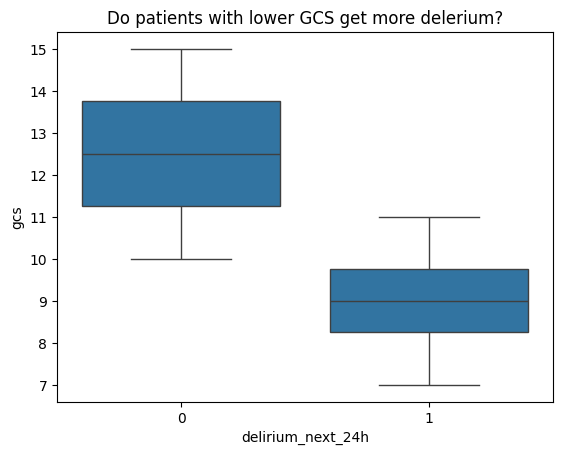

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='delirium_next_24h', y='gcs', data=data)
plt.title('Do patients with lower GCS get more delerium?')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X=data.drop(['patient_id','delirium_next_24h'],axis=1)
y=data['delirium_next_24h']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,pred))

Accuracy: 0.75


In [23]:
new_patient = [[
    65,   # age
    0,    # gender (0=M)
    10,   # gcs
    1.5,  # bilirubin
    140,  # sodium
    1.1,  # creatinine
    25,   # urea
    10.0, # wbc
    85,   # hr
    120,  # bp_sys
    80,   # bp_dia
    37.0, # temp
    95,   # spo2
    1     # sedative
]]

prediction = model.predict(new_patient)

print("Will get delirium?" , "Yes" if prediction[0]==1 else "No")

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [19]:
data =  data.drop(columns=['gender'])

In [20]:
data.head()

,patient_id,age,gcs,total_bilirubin,sodium,creatinine,urea,wbc,hr,bp_sys,bp_dia,temp,spo2,sedative,delirium_next_24h
0,1,68,13,1.2,138,1.1,22,9.5,90,120,75,37.1,95,1,0
1,2,74,9,2.1,142,1.3,30,13.2,105,110,70,36.8,92,1,1
2,3,55,15,0.8,135,0.9,18,7.1,75,115,78,37.0,96,0,0
3,4,60,10,1.5,140,1.2,28,11.0,95,130,85,37.3,93,1,1
4,5,70,11,1.3,139,1.0,24,8.8,80,118,74,36.9,94,0,0


In [22]:
print(data.isnull().sum())

patient_id           0
age                  0
gcs                  0
total_bilirubin      0
sodium               0
creatinine           0
urea                 0
wbc                  0
hr                   0
bp_sys               0
bp_dia               0
temp                 0
spo2                 0
sedative             0
delirium_next_24h    0
dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age','gcs','total_bilirubin','sodium','creatinine','urea',
                     'wbc','hr','bp_sys','bp_dia','temp','spo2','sedative']

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])


NameError: name 'X_train' is not defined

In [36]:
x = data.drop('delirium_next_24h',axis=1)
y = data['delirium_next_24h']





In [1]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)
model.fit(X_train_res, y_train_res)


NameError: name 'X_train_scaled' is not defined

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
